In [1]:
import os, sys, re
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
year = "2017"
name = "njets"

with open('xsec.json') as f:
    xs = json.load(f)

with open('pmap.json') as f:
    pmap = json.load(f)
    
with open('lumi.json') as f:
    lumis = json.load(f)

indir = "outfiles-plots/"
infiles = subprocess.getoutput("ls "+indir+year+"_*.coffea").split()
outsum = processor.dict_accumulator()


In [3]:
started = 0 
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum[name] = out[name]
            outsum['sumw'] = out['sumw']
            started += 1
        else:
            outsum[name].add(out[name])
            outsum['sumw'].add(out['sumw'])

        del out

Loading outfiles-plots/2017_dask_JetHTData.coffea
Loading outfiles-plots/2017_dask_QCD.coffea


In [4]:
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}

outsum[name].scale(scale_lumi, 'dataset')
templates = outsum[name].group('dataset', hist.Cat('process', 'Process'), pmap)

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7ffafc2eef40>
  warnings.warn(


In [5]:
print(templates.identifiers('process'))

[<StringBin (QCD) instance at 0x7ffb1c33ff10>, <StringBin (QCDHT) instance at 0x7ffafc2eeb80>, <StringBin (data) instance at 0x7ffafc2c8400>]


In [6]:
templates

<Hist (process,region,pt1,msd1,njets,ddb1) instance at 0x7ffaf484c3a0>

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


Text(0.5, 0.98, 'QCD MC, VBF cat')

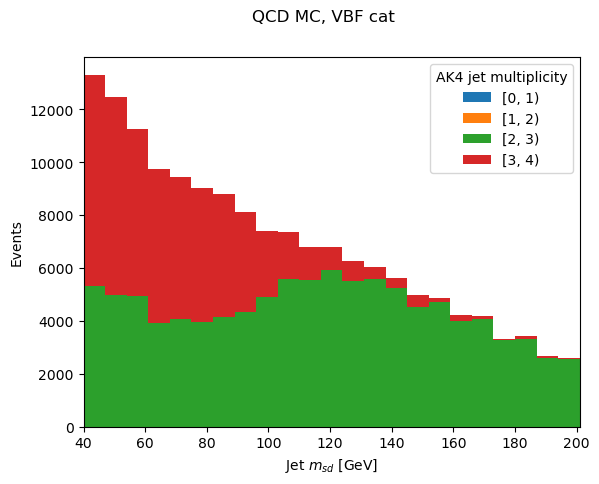

In [7]:
templates1 = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('ddb1','pt1')
hist.plot1d(templates1,overlay='njets',stack=True)
plt.suptitle('QCD MC, VBF cat')

Text(0.5, 0.98, 'QCD MC, VBF cat')

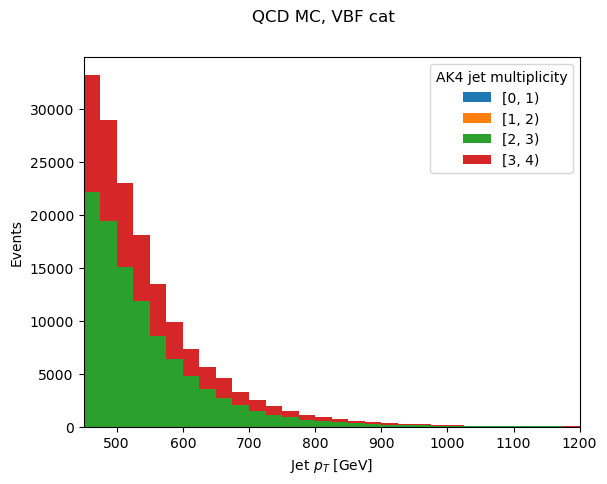

In [8]:
templates1p5 = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('ddb1','msd1')
hist.plot1d(templates1p5,overlay='njets',stack=True)
plt.suptitle('QCD MC, VBF cat')

Text(0.5, 0.98, 'QCD MC, ggF cat')

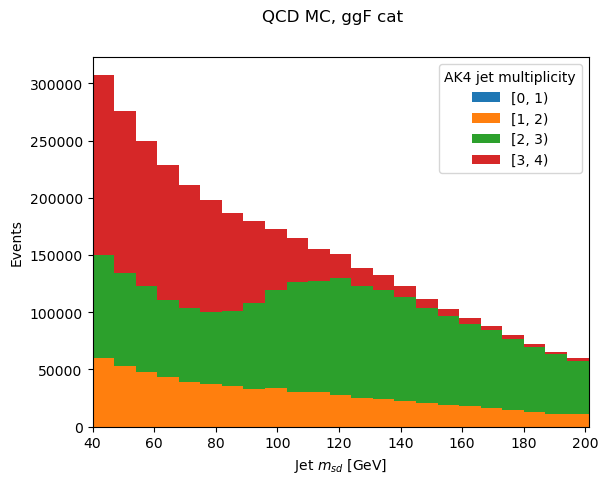

In [9]:
templates1 = templates.integrate('region',['signal-ggf']).integrate('process','QCD').sum('ddb1','pt1')
hist.plot1d(templates1,overlay='njets',stack=True)
plt.suptitle('QCD MC, ggF cat')

Text(0.5, 0.98, 'QCD MC, ggF cat')

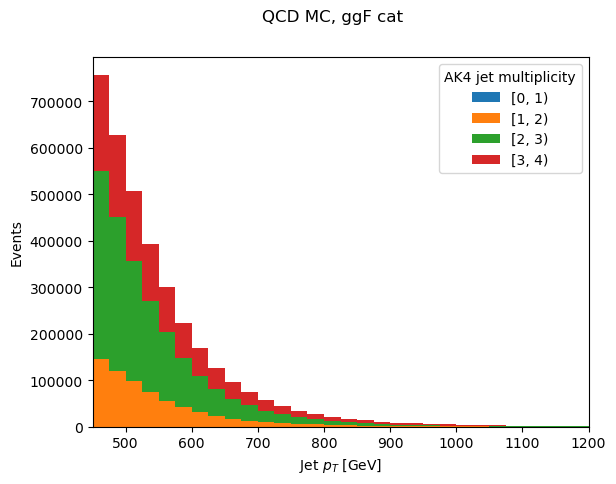

In [10]:
templates1p5 = templates.integrate('region',['signal-ggf']).integrate('process','QCD').sum('ddb1','msd1')
hist.plot1d(templates1p5,overlay='njets',stack=True)
plt.suptitle('QCD MC, ggF cat')

Text(0.5, 0.98, 'QCD MC, VBF cat, DDB pass')

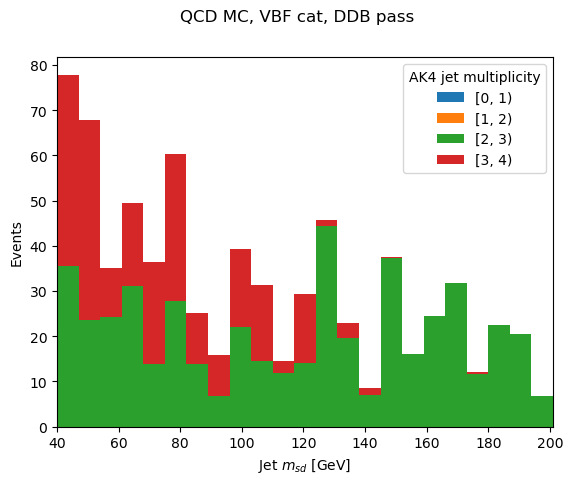

In [11]:
templates1P = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('pt1').integrate('ddb1',int_range=slice(0.64,1))
hist.plot1d(templates1P,overlay='njets',stack=True)
plt.suptitle('QCD MC, VBF cat, DDB pass')

Text(0.5, 0.98, 'QCD MC, VBF cat, DDB fail')

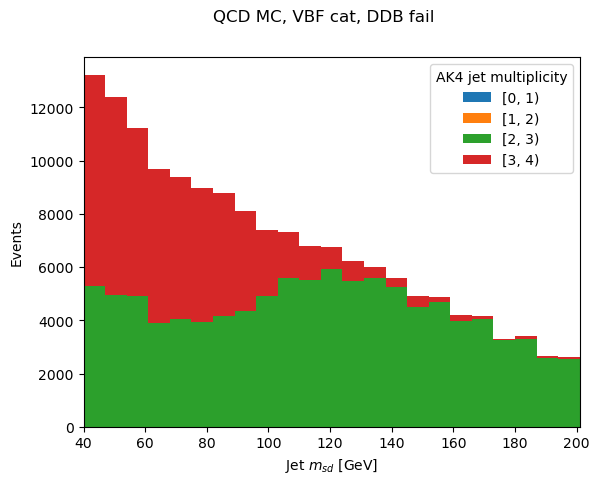

In [12]:
templates1F = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('pt1').integrate('ddb1',int_range=slice(0,0.64))
hist.plot1d(templates1F,overlay='njets',stack=True)
plt.suptitle('QCD MC, VBF cat, DDB fail')

<AxesSubplot: xlabel='Jet $m_{sd}$ [GeV]', ylabel='Events'>

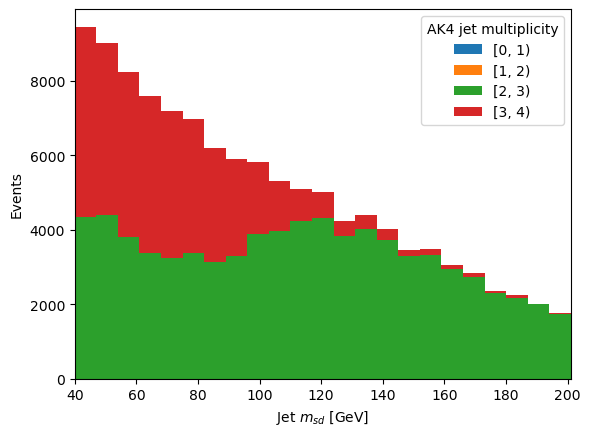

In [13]:
templates2 = templates.integrate('region',['signal-vbf']).integrate('process','QCDHT').sum('ddb1','pt1')
hist.plot1d(templates2,overlay='njets',stack=True)

<AxesSubplot: xlabel='Jet $m_{sd}$ [GeV]', ylabel='Events'>

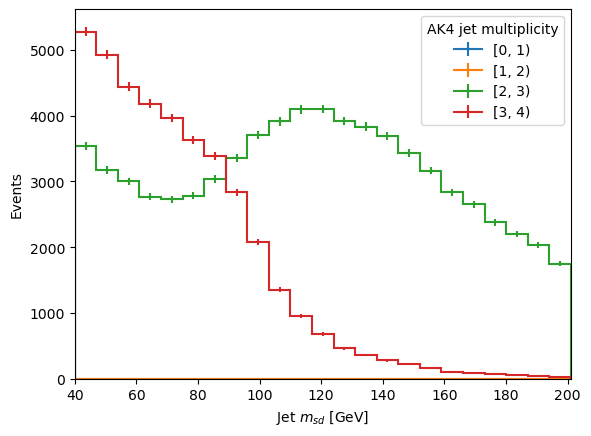

In [14]:
templates2 = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('ddb1','pt1')
hist.plot1d(templates2,overlay='njets')

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


Text(0.5, 0.98, 'Data, VBF cat')

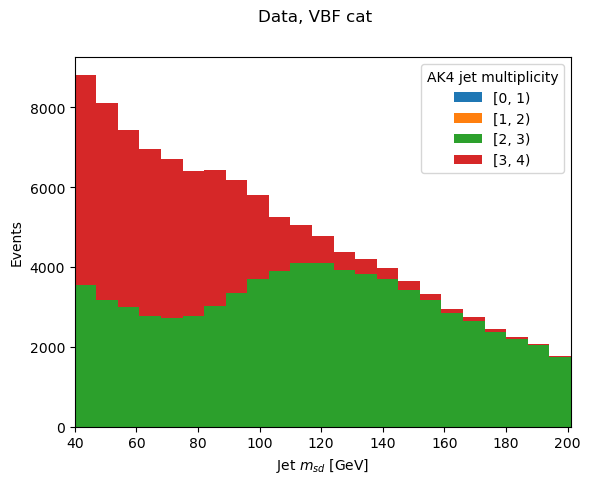

In [15]:
templates3 = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('ddb1','pt1')
hist.plot1d(templates3,overlay='njets',stack=True)
plt.suptitle('Data, VBF cat')

Text(0.5, 0.98, 'Data, VBF cat')

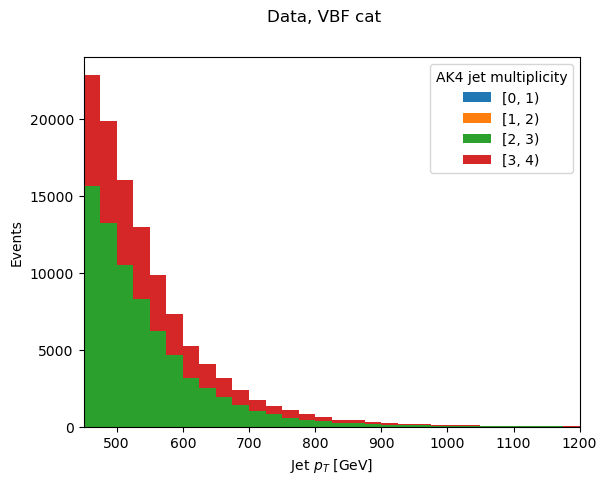

In [16]:
templates3p5 = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('ddb1','msd1')
hist.plot1d(templates3p5,overlay='njets',stack=True)
plt.suptitle('Data, VBF cat')

Text(0.5, 0.98, 'Data, ggF cat')

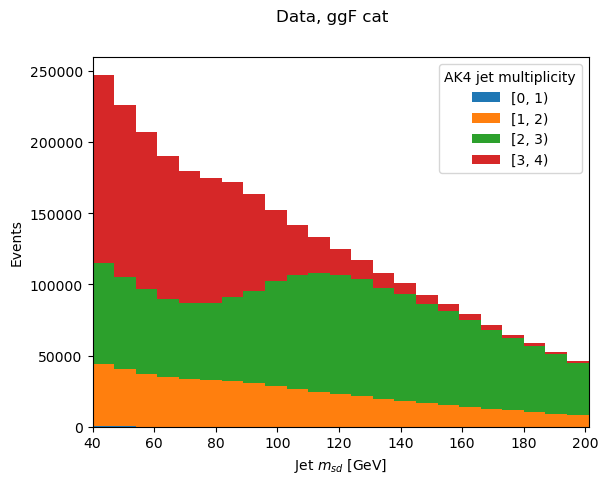

In [17]:
templates3 = templates.integrate('region',['signal-ggf']).integrate('process','data').sum('ddb1','pt1')
hist.plot1d(templates3,overlay='njets',stack=True)
plt.suptitle('Data, ggF cat')

<AxesSubplot: xlabel='Jet $p_T$ [GeV]', ylabel='Events'>

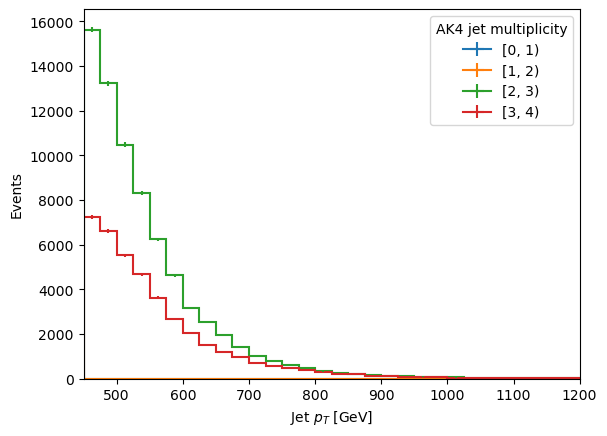

In [18]:
hist.plot1d(templates3p5,overlay='njets',stack=False)

Text(0.5, 0.98, 'Data, ggF cat')

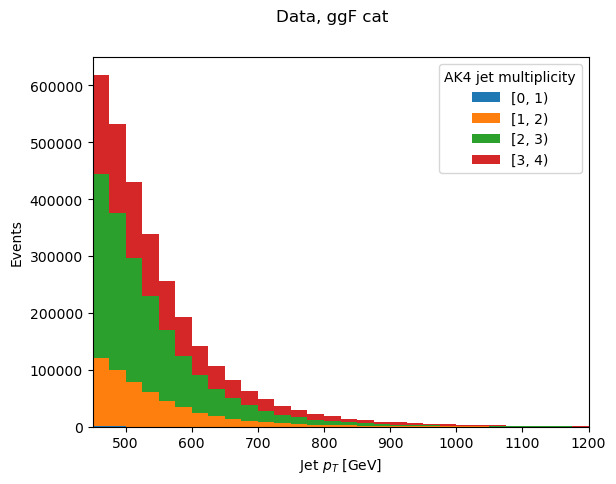

In [19]:
templates3p5 = templates.integrate('region',['signal-ggf']).integrate('process','data').sum('ddb1','msd1')
hist.plot1d(templates3p5,overlay='njets',stack=True)
plt.suptitle('Data, ggF cat')

<AxesSubplot: xlabel='Jet $p_T$ [GeV]', ylabel='Events'>

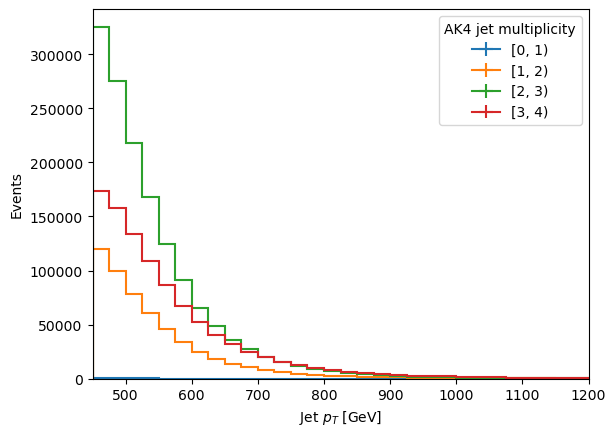

In [20]:
#hist.plot1d(templates3,overlay='njets',stack=False)
hist.plot1d(templates3p5,overlay='njets',stack=False)

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


Text(0.5, 0.98, 'Data, VBF cat, DDB pass')

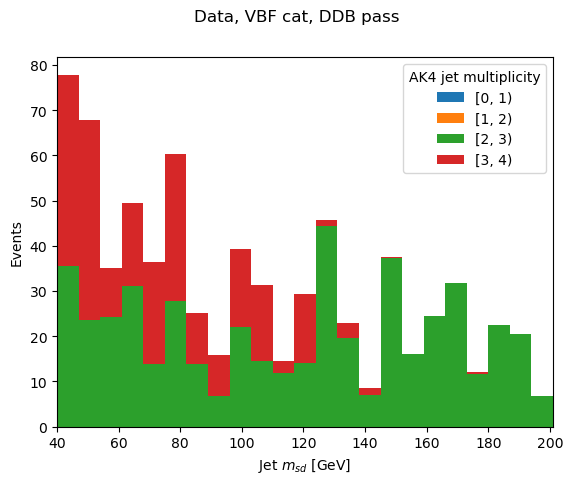

In [21]:
templates3P = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('pt1').integrate('ddb1',int_range=slice(0.64,1))
hist.plot1d(templates1P,overlay='njets',stack=True)
plt.suptitle('Data, VBF cat, DDB pass')

Text(0.5, 0.98, 'Data, VBF cat, DDB fail')

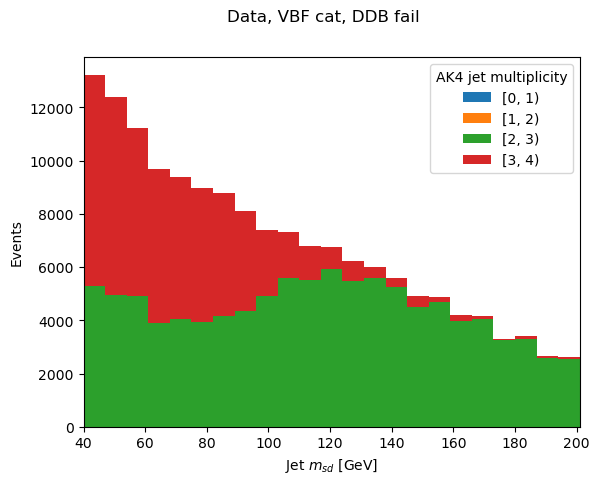

In [22]:
templates3F = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('pt1').integrate('ddb1',int_range=slice(0,0.64))
hist.plot1d(templates1F,overlay='njets',stack=True)
plt.suptitle('Data, VBF cat, DDB fail')

Text(0.5, 0.98, 'Data, VBF cat, 2 jets')

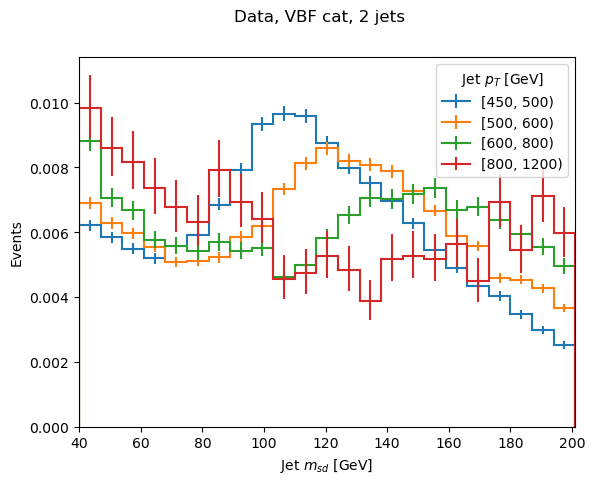

In [23]:
templates4 = templates.integrate('region',['signal-vbf']).integrate('process','data').sum('ddb1').integrate('njets',int_range=slice(2,3))
templates4 = templates4.rebin('pt1',hist.Bin('pt1', r'Jet $p_{T}$ [GeV]', [450, 500, 600, 800, 1200]))
hist.plot1d(templates4,overlay='pt1',density=True)
plt.suptitle('Data, VBF cat, 2 jets')

Text(0.5, 0.98, 'QCD MC, VBF cat, 2 jets')

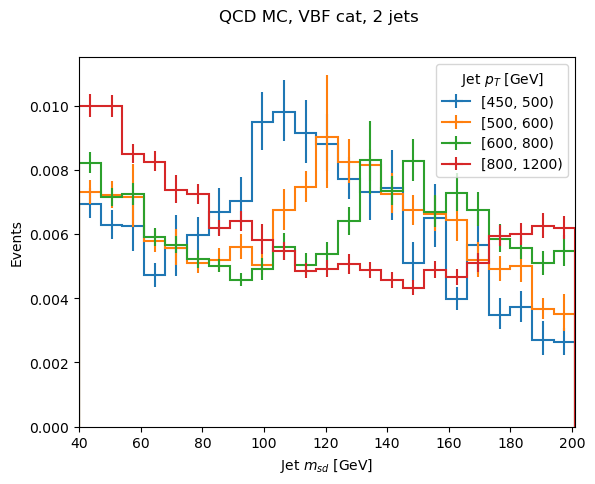

In [24]:
templates5 = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('ddb1').integrate('njets',int_range=slice(2,3))
templates5 = templates5.rebin('pt1',hist.Bin('pt1', r'Jet $p_{T}$ [GeV]', [450, 500, 600, 800, 1200]))
hist.plot1d(templates5,overlay='pt1',density=True)
plt.suptitle('QCD MC, VBF cat, 2 jets')

Text(0.5, 0.98, 'QCD MC, VBF cat, 2 jets')

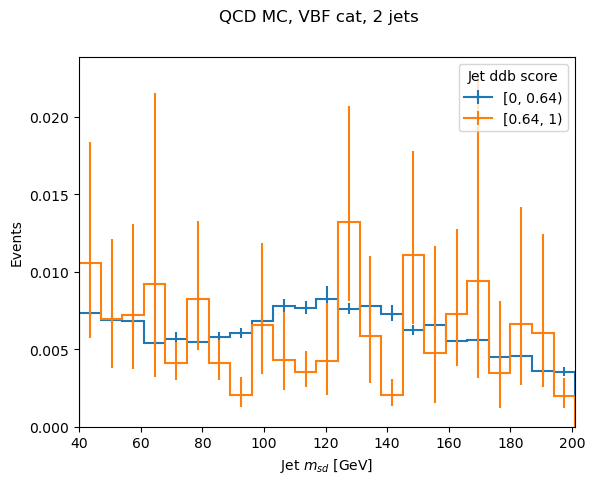

In [25]:
templates5 = templates.integrate('region',['signal-vbf']).integrate('process','QCD').sum('pt1').integrate('njets',int_range=slice(2,3))
#templates5 = templates5.rebin('pt1',hist.Bin('pt1', r'Jet $p_{T}$ [GeV]', [450, 500, 600, 800, 1200]))
hist.plot1d(templates5,overlay='ddb1',density=True)
plt.suptitle('QCD MC, VBF cat, 2 jets')